# Importando Base de Dados

In [29]:
import pandas as pd

In [30]:
dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


# Tipos de Imóveis

In [31]:
tipo_de_imovel = pd.DataFrame(dados.Tipo)

In [32]:
# Removendo duplicatas
tipo_de_imovel.drop_duplicates(inplace = True)

In [33]:
# Refazendo index
tipo_de_imovel.columns.name = 'ID'
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel

ID,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Imóveis Residênciais

In [34]:
#ARMAZENAR APENAS OS IMÓVEIS RESIDENSIAVEIS NESSA VARIAVEL:
residencial = ['Quitinete', 
'Casa',
'Apartamento',
'Casa de Condomínio',
'Casa de Vila']

In [35]:
#Filtrando os imóveis. Se ele for igual ao parametro passado, gerará um true or false:

selecao = dados.Tipo.isin(residencial)

In [36]:
#Ao criarmos um DF com isin, ele plotará apenas os dados true:
#Está sendo usado a variavel selecao como parâmetro para o DF:

dados_residencial = dados[selecao]
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [37]:
#Redefinido o index:

dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


# Exportando a Base de Dados

In [38]:
dados_residencial.to_csv('aluguel_residencial.csv', sep =';')

#Seleções e Frequências

####Apartamentos



In [39]:
# Selecione somente os imóveis classificados com tipo 'Apartamento'
selecao = (dados_residencial.Tipo == 'Apartamento')
n1 = dados_residencial[selecao].shape[0]

####Casas


In [40]:
# Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selecao = (dados_residencial.Tipo == 'Casa')| (dados_residencial.Tipo =='Casa de Condomínio')| (dados_residencial.Tipo == 'Casa de Vila')
n2 = dados_residencial[selecao].shape[0]

####Casas e apartamentos com área entre 60 e 100 metros quadrados, incluindo os limites

In [41]:
selecao = (dados_residencial.Area>=60) & (dados_residencial.Area<=100)
n3 = dados_residencial[selecao].shape[0]

#### Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.

In [42]:
selecao = (dados_residencial.Quartos >= 4) & (dados_residencial.Valor < 2000)
n4 = dados_residencial[selecao].shape[0]

In [43]:
print("N° de  imóveis classificados com tipo 'Apartamento'=> {}".format(n1))
print("N° de  imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' => {}".format(n2))
print("N° de casas e apartamentos com área entre 60 e 100 metros quadrados, incluindo os limites => {}".format(n3))
print("N° de casas e apartamentos que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 => {}".format(n4))

N° de  imóveis classificados com tipo 'Apartamento'=> 19532
N° de  imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' => 2212
N° de casas e apartamentos com área entre 60 e 100 metros quadrados, incluindo os limites => 8719
N° de casas e apartamentos que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00 => 41


# Tratando Dados Faltantes

In [44]:
# Total de Valores nulos presentes em cada coluna
dados_residencial.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            9
Condominio    1815
IPTU          6785
dtype: int64

## 1° Método - Substituir todos os valores nulos por 0

In [45]:
# Criar um dicionário que indicará os valores que será colocado dnos espços nulos das variáveis
dados_residencial = dados_residencial.fillna({'Valor':0,'Condominio': 0, 'IPTU': 0})

In [46]:
dados_residencial.shape

(22580, 9)

In [47]:
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


## 2° Método - Removendo valores nulos individualmente

####(Não vermos mudança, pois os valores nulos já foram substituídos por 0)

In [48]:
#Retirando o "Valor"  com valores nulos
print('Qtd de Valor => {}'.format(dados_residencial.shape[0]))
dados_residencial.dropna(subset=['Valor'], inplace= True)
print('Qtd de Valor após limpeza=> {}'.format(dados_residencial.shape[0]))

Qtd de Valor => 22580
Qtd de Valor após limpeza=> 22580


In [49]:
#Retirando o "Condominio" com valores nulos
print('Qtd de Condominio => {}'.format(dados_residencial.shape[0]))
dados_residencial.dropna(subset=['Condominio'], inplace = True)
print('Qtd de Condominio após limpeza=> {}'.format(dados_residencial.shape[0]))

Qtd de Condominio => 22580
Qtd de Condominio após limpeza=> 22580


In [50]:
#Retirando o "IPTU" com valores nulos
print('Qtd de IPTU => {}'.format(dados_residencial.shape[0]))
dados_residencial.dropna(subset=['IPTU'], inplace = True)
print('Qtd de IPTU após limpeza=> {}'.format(dados_residencial.shape[0]))

Qtd de IPTU => 22580
Qtd de IPTU após limpeza=> 22580


In [51]:
# Verificando se ainda tem valores nulos em nosso DF
dados_residencial.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

# Criando Novas Variáveis

In [52]:
dados_residencial['Valor Bruto'] = dados_residencial.Valor + dados_residencial.IPTU + dados_residencial.Condominio
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0


In [53]:
dados_residencial['Valor m2'] = (dados_residencial.Valor / dados_residencial.Area).round(2)
dados_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
8,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0,1200.0,33.33
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43


In [54]:
#Valor bruto m2:
dados_residencial['Valor Bruto m2'] = (dados_residencial['Valor Bruto']/dados_residencial.Area).round(2)
dados_residencial.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,1200.0,17.14,17.14


In [55]:
casa = ['Casa', 'Casa de Condomínio', 'Casa de Vila']

###O aplly: trabalha em determinada coluna, passando por todas as linhas aplicando uma função em cada uma delas
###Funcao Lambda, é uma função anônima de apenas 1 linha

In [56]:
#                                                                  retorna imovel 'Casa' se imovel in casa senao 'Apartamento'
dados_residencial['Tipo Agregado'] = dados_residencial.Tipo.apply(lambda imovel : 'Casa' if imovel in casa else 'Apartamento')
dados_residencial.head(4)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento


## Excluindo Variáveis

In [57]:
dados_residencial.drop(['Valor Bruto', 'Valor Bruto m2'], axis = 1, inplace = True)

In [58]:
dados_residencial.head(4)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento


#Criando Agrupamentos



### Agrupando por Bairros "nobres" do Rio de Janeiro

In [59]:
bairro  = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [60]:
# Selecao com os Bairros do DF que são iguais a 'bairro'. Usaremos o Isin, pois ao usarmos ele como referencia, será criado um Df apenas com os valores "Trues"
selecao = dados_residencial.Bairro.isin(bairro)
dados_residencial = dados_residencial[selecao]

## Agrupando os Bairros

In [61]:
grupo_bairro = dados_residencial.groupby('Bairro')

#### Criaremos um laço 'for' passando a chava criada, dados e o grupo
#### Utilizaremos esse formato no for porque a intenção é mostras as chaves

In [62]:
# para chave, dados in grupo bairros

for bairro, dados_residencial in grupo_bairro:
    print(bairro)

# for chave, valor in grupo_bairro:
# print(chave)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


## Valor Médio do Aluguel em cada um Desses Bairros


In [63]:
for bairro, dados_residencial in grupo_bairro:
  print('{} => R$ {}'.format(bairro, dados_residencial.Valor.mean().round(2)))

Barra da Tijuca => R$ 7071.92
Botafogo => R$ 8681.2
Copacabana => R$ 4135.91
Flamengo => R$ 4148.49
Ipanema => R$ 9375.91
Leblon => R$ 8757.75
Tijuca => R$ 2042.19


## Valor Mínimo e Valor Máximo do Aluguel em cada um Desses Bairros


In [64]:
# Aggregate é utilizado para mostrar apenas as estatísticas que te enteressa
grupo_bairro.Valor.aggregate(['min', 'max']).rename(columns ={'min': 'Mínimo', 'max':'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,0.0,600000.0
Botafogo,0.0,4500000.0
Copacabana,0.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


## Valor Médio por Bairro - Graficamente

Text(0.5, 1.0, 'Valor Médio do Aluguel por bairro')

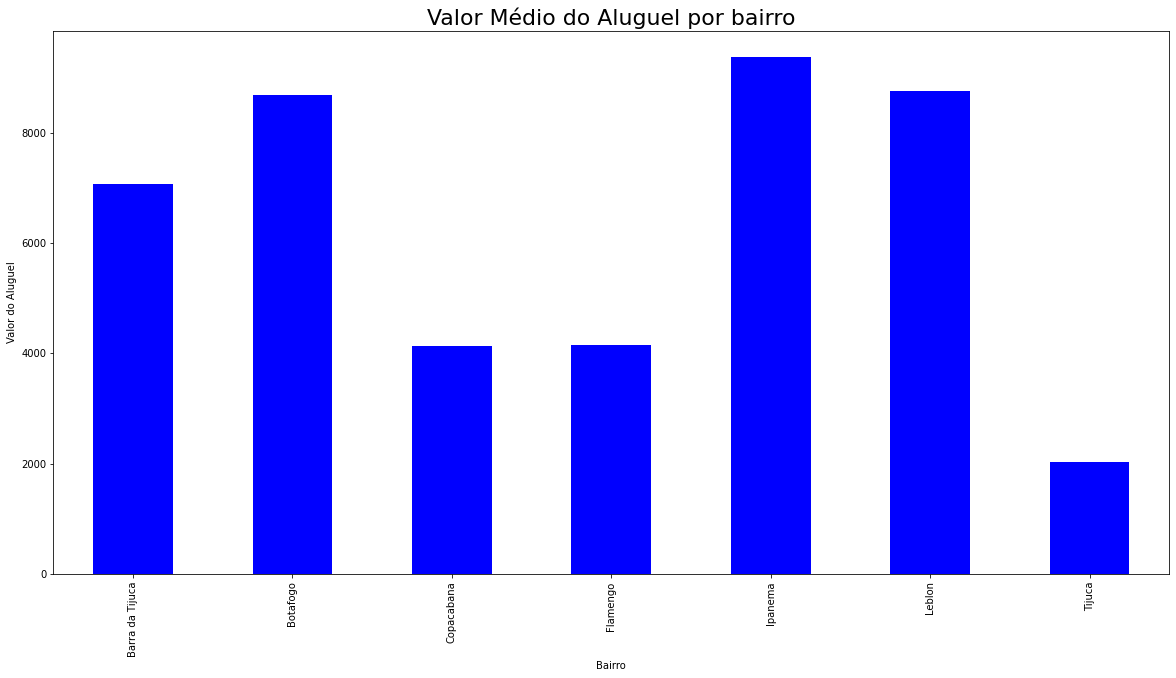

In [65]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))
fig = grupo_bairro.Valor.mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por bairro', {'fontsize':22})

## Identificando e Removendo Outliers

## Calculando os Quartis

In [80]:
valor = dados_residencial.Valor

In [83]:
Q1 = valor.quantile(.25) #primeiro quartil
Q3 = valor.quantile(.75) #terceiro quartil
IIQ = Q3 - Q1  #mediana
lim_inferior = Q1 - 1.5 * IIQ
lim_superior = Q3 + 1.5 * IIQ

# Criando Selecao para Excluir Outliers

### Verificar Através do Boxplot se Há Outliers

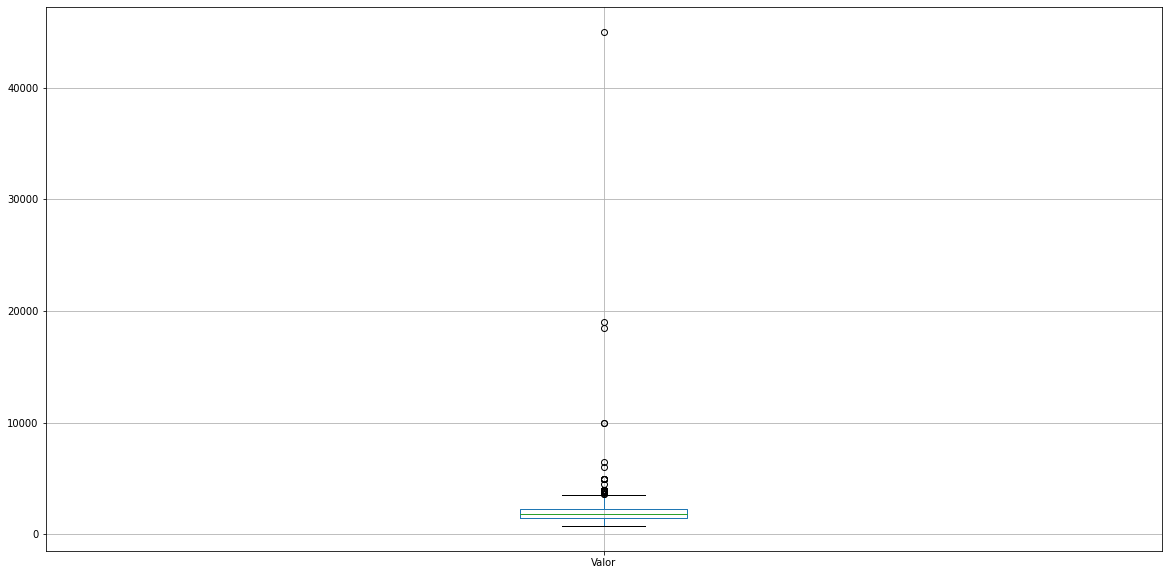

In [91]:
# Claramente é possível notar que temos candidatos a outliers, aluguel mais de 10k
dados_residencial.boxplot('Valor')

### Removendo Outliers através de uma seleção

In [88]:
selecao = (valor>= lim_inferior) & (valor<= 10000)
dados_new = dados_residencial[selecao]

### Visualizando Boxplot após remoção dos outliers

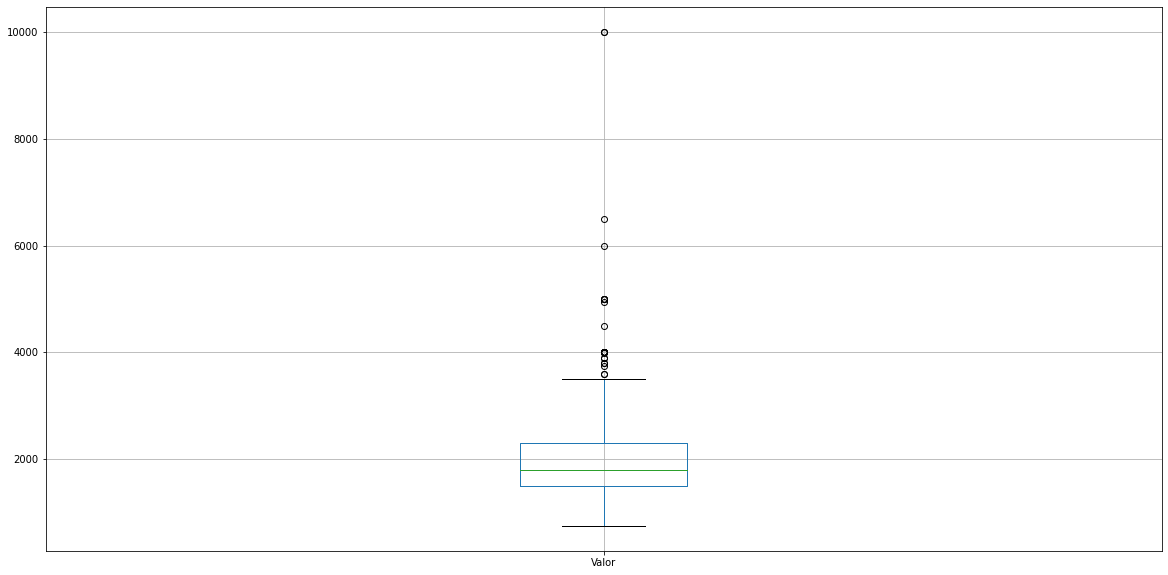

In [89]:
# Boxplot depois da remoção do outliers
dados_new.boxplot('Valor')

### Histograma antes e depois da remoção dos outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70c6a8b820>]],
      dtype=object)

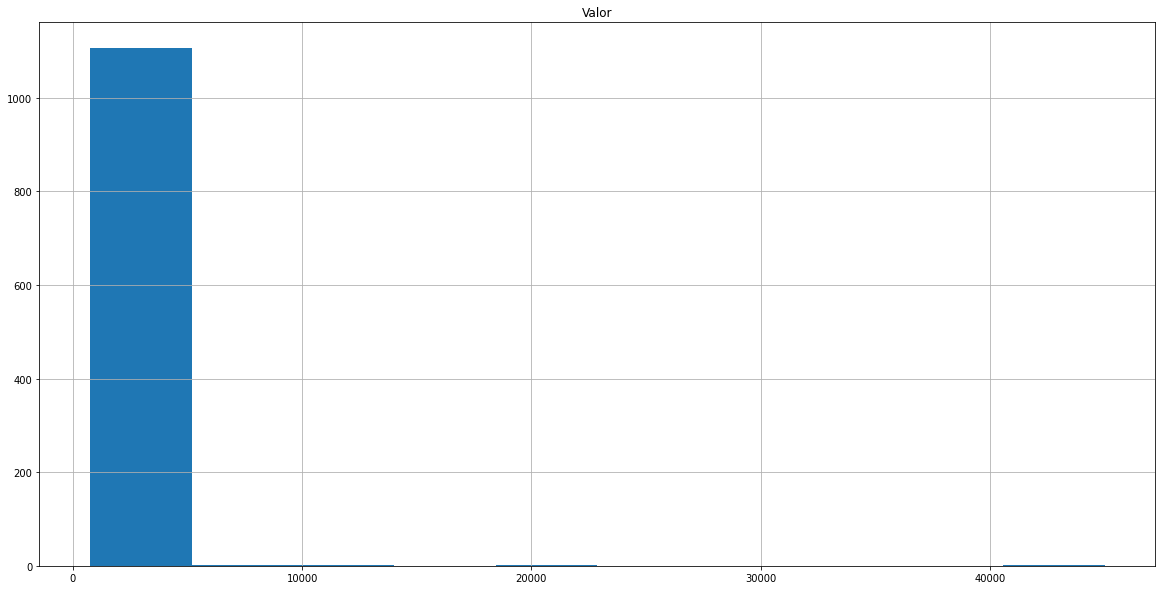

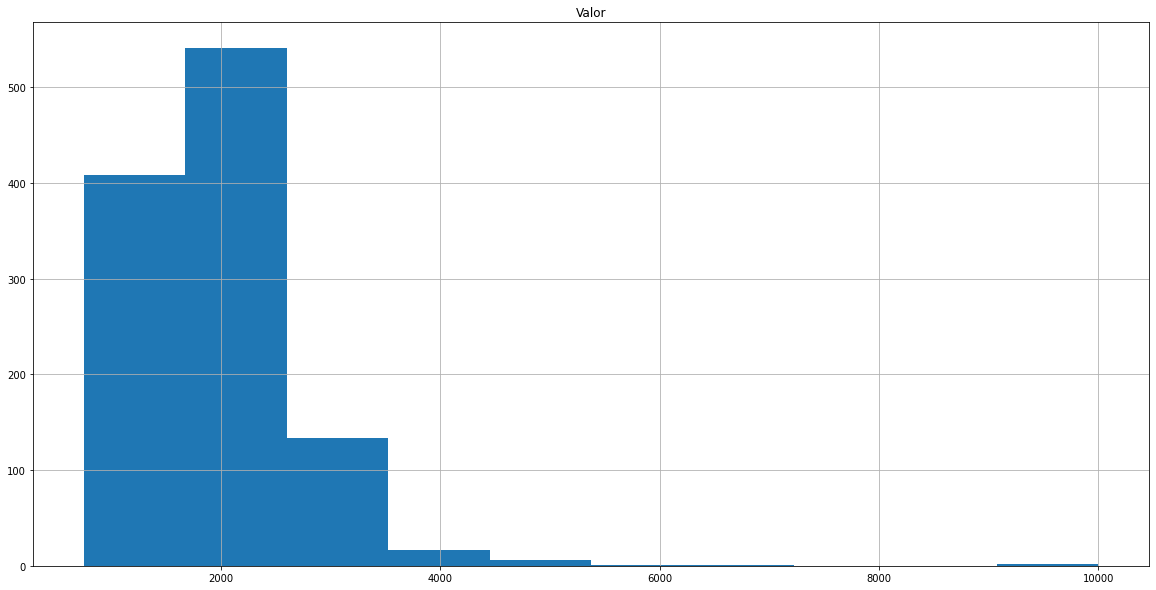

In [92]:
dados_residencial.hist(['Valor'])
dados_new.hist(['Valor'])

##  Identificando e Removendo Outliers por Grupo

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


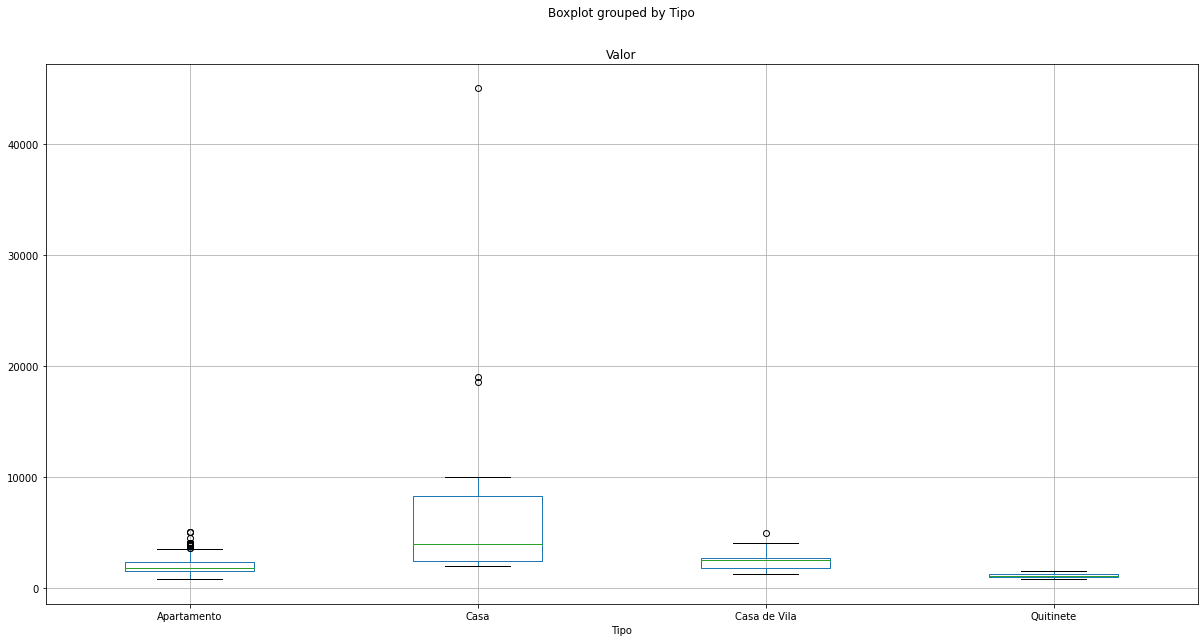

In [94]:
dados_residencial.boxplot(['Valor'], by = 'Tipo')

In [95]:
# Dessa forma iremos separar de acordo com o grupo e o valor total de cada grupo
grupo_tipo = dados_residencial.groupby('Tipo')['Valor']

In [98]:
# Criar Estatísticas e Limites dessses grupos
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1  #mediana
lim_inferior = Q1 - 1.5 * IIQ
lim_superior = Q3 + 1.5 * IIQ

## Criando Selecao para Excluir Outliers

In [99]:
dados_new = pd.DataFrame()

####Para tipo(nome da var que vai rodar) em grupo_tipo.groups(variável agrupada com groupby)

####Serão coletadas as chaves do dicionário. Agora precisaremos realizar uma seleção e em um caso que temos mais de um tipo de variável, Tipo e Valor.

In [108]:
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados_residencial['Tipo'] == tipo
  eh_dentro_limite = (dados_residencial['Valor'] >= lim_inferior[tipo]) & (dados_residencial['Valor'] <= lim_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados_residencial[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


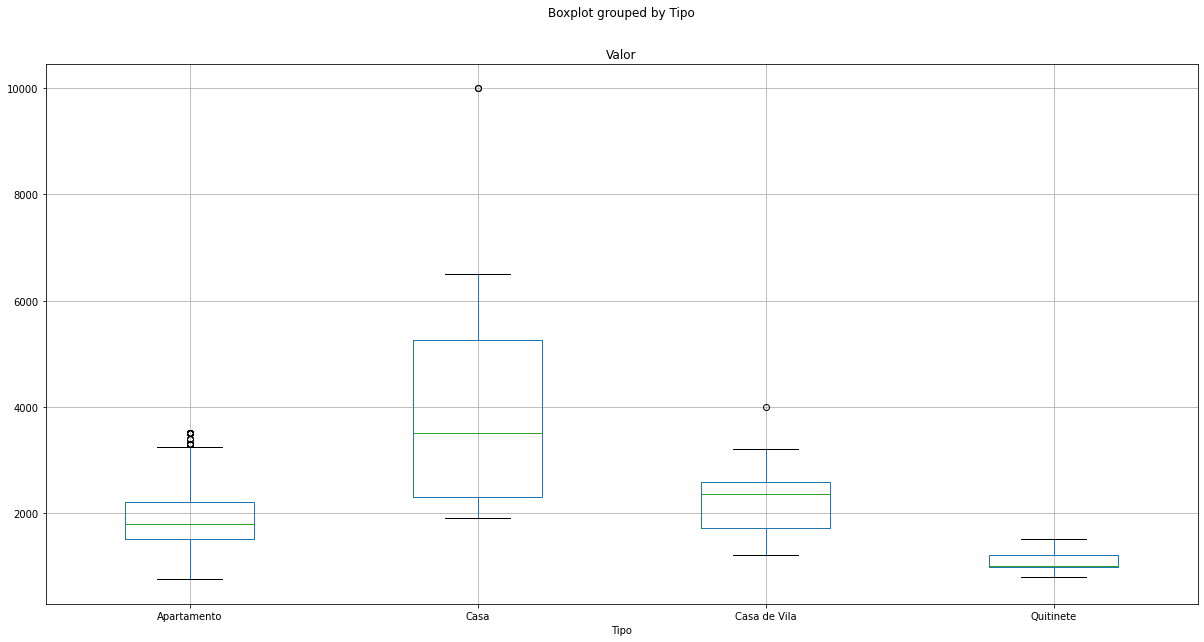

In [112]:
#Boxplot após a remoção dos outliers
dados_new.boxplot(['Valor'], by = 'Tipo')